# Bikram Rumba
**MSCS-634-B01 Advanced Big Data and Data Mining**
**Data Visualization, Data Preprocessing, and Statistical Analysis**


In [26]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("✓ All libraries imported successfully!\n")


filename = '/retail_sales_dataset.csv'

print(f"Attempting to load: {filename}")
print("-" * 50)

try:
    # Try to load the file
    df = pd.read_csv(filename)
    print(f"SUCCESS! File '{filename}' loaded successfully!\n")

except FileNotFoundError:
    print(f"ERROR: File '{filename}' not found!")

    import os
    print([f for f in os.listdir('.') if f.endswith('.csv')])
    raise

except Exception as e:
    print(f"ERROR: {e}")
    raise


# DATASET INFORMATION
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f" Number of rows: {len(df):,}")
print(f" Number of columns: {len(df.columns)}")
print(f"Dataset shape: {df.shape}")

print(f"\n Column Names ({len(df.columns)} total):")
print("-" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\n Data Types:")
print("-" * 50)
print(df.dtypes)

print(f"\n Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 80)
print("First 5 rows of dataset (.head())")
print("=" * 80)
print(df.head())

print("\n" + "=" * 80)
print("Random 5 rows (.sample())")
print("=" * 80)
print(df.sample(min(5, len(df))))

print("\n" + "=" * 80)
print("=" * 80)
print(f" Dataset has {df.shape[0]:,} rows and {df.shape[1]} columns")



✓ All libraries imported successfully!

Attempting to load: /retail_sales_dataset.csv
--------------------------------------------------
SUCCESS! File '/retail_sales_dataset.csv' loaded successfully!

DATASET OVERVIEW
 Number of rows: 1,000
 Number of columns: 9
Dataset shape: (1000, 9)

 Column Names (9 total):
--------------------------------------------------
    1. Transaction ID
    2. Date
    3. Customer ID
    4. Gender
    5. Age
    6. Product Category
    7. Quantity
    8. Price per Unit
    9. Total Amount

 Data Types:
--------------------------------------------------
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

 Memory Usage: 0.25 MB

First 5 rows of dataset (.head())
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  

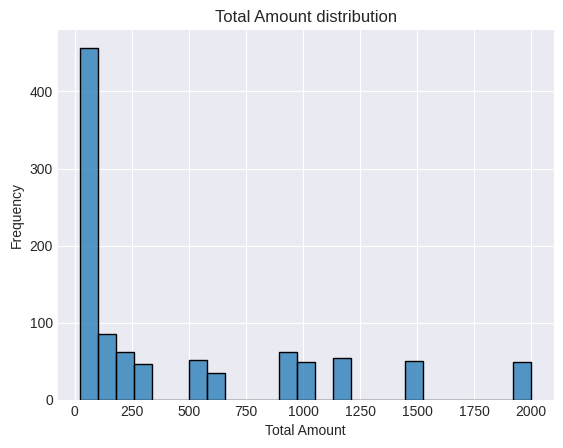

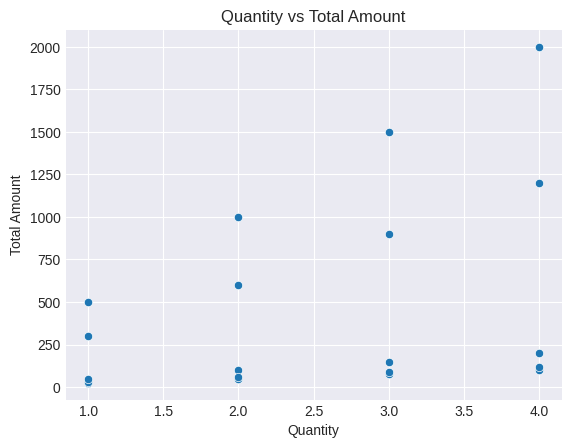

In [27]:
# Step 2: Data Visualization

# Histogram of Total Amount
plt.figure()
sns.histplot(df['Total Amount'], bins=25)
plt.title('Total Amount distribution')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

print('\n');
# Scatter: Quantity vs Total Amount
plt.figure()
sns.scatterplot(x=df['Quantity'], y=df['Total Amount'])
plt.title('Quantity vs Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()


In [21]:
# Step 3.1: Handling Missing Values

print("Missing values before:")
print(df.isnull().sum())

# Numeric: fill with median
num_cols = ['Age', 'Quantity', 'Total Amount']
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Categorical: fill with mode
cat_cols = ['Gender', 'Product Category']
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nMissing values after:")
print(df.isnull().sum())

df.head()


Missing values before:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing values after:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [22]:
# Step 3.2 Outlier Detection and Removal using IQR

cols = ['Age', 'Quantity', 'Total Amount']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"\n{col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers found: {outliers.shape[0]}")

df_before_outliers = df.copy()

# Remove across all selected columns
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nDataset size after outlier removal:", df.shape)
df.head()



Age
Q1: 29.0
Q3: 53.0
IQR: 24.0
Lower bound: -7.0
Upper bound: 89.0
Outliers found: 0

Quantity
Q1: 1.0
Q3: 4.0
IQR: 3.0
Lower bound: -3.5
Upper bound: 8.5
Outliers found: 0

Total Amount
Q1: 60.0
Q3: 900.0
IQR: 840.0
Lower bound: -1200.0
Upper bound: 2160.0
Outliers found: 0

Dataset size after outlier removal: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [23]:
# Step 3.3 Data Reduction

print("Before reduction:", df.shape)

# Sampling 80 percent
df_sampled = df.sample(frac=0.8, random_state=42)

# Drop columns not needed for analysis
df_reduced = df_sampled.drop(columns=['Transaction ID', 'Customer ID'])

print("After reduction:", df_reduced.shape)
df_reduced.head()


Before reduction: (1000, 9)
After reduction: (800, 7)


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,2023-01-01,Male,46,Beauty,3,500,1500
737,2023-04-25,Male,41,Clothing,2,50,100
740,2023-11-30,Male,48,Clothing,1,300,300
660,2023-07-16,Female,44,Clothing,4,25,100
411,2023-09-16,Female,19,Electronics,4,500,2000


In [24]:
# Step 3.4 Data Scaling and Discretization

from sklearn.preprocessing import StandardScaler

df_scaled = df_reduced.copy()

scaler = StandardScaler()
df_scaled[['Quantity', 'Total Amount']] = scaler.fit_transform(df_scaled[['Quantity', 'Total Amount']])

# Age bins
df_scaled['Age Group'] = pd.cut(
    df_scaled['Age'],
    bins=[0, 25, 45, 65, 120],
    labels=['Youth', 'Adult', 'Middle', 'Senior']
)

print(df_scaled.head())
print(df_scaled[['Quantity', 'Total Amount']].describe())


          Date  Gender  Age Product Category  Quantity  Price per Unit  \
521 2023-01-01    Male   46           Beauty  0.424869             500   
737 2023-04-25    Male   41         Clothing -0.448898              50   
740 2023-11-30    Male   48         Clothing -1.322665             300   
660 2023-07-16  Female   44         Clothing  1.298636              25   
411 2023-09-16  Female   19      Electronics  1.298636             500   

     Total Amount Age Group  
521      1.895909    Middle  
737     -0.645052     Adult  
740     -0.282058    Middle  
660     -0.645052     Adult  
411      2.803395     Youth  
           Quantity  Total Amount
count  8.000000e+02  8.000000e+02
mean   7.105427e-17 -2.109424e-17
std    1.000626e+00  1.000626e+00
min   -1.322665e+00 -7.811754e-01
25%   -1.322665e+00 -7.176514e-01
50%    4.248693e-01 -5.543039e-01
75%    1.298636e+00  8.069253e-01
max    1.298636e+00  2.803395e+00


In [28]:
# Step 4: Statistical Analysis

print("=== .info() ===")
print(df_scaled.info())

print("\n=== .describe() ===")
print(df_scaled.describe(include='all'))

# Central tendency
print("\n=== Central Tendency ===")
print("Min:\n", df_scaled[['Age','Quantity','Total Amount']].min())
print("\nMax:\n", df_scaled[['Age','Quantity','Total Amount']].max())
print("\nMean:\n", df_scaled[['Age','Quantity','Total Amount']].mean())
print("\nMedian:\n", df_scaled[['Age','Quantity','Total Amount']].median())
print("\nMode:\n", df_scaled[['Age','Quantity','Total Amount']].mode().iloc[0])

# Dispersion
print("\n=== Dispersion Measures ===")
print("Range:\n", df_scaled[['Age','Quantity','Total Amount']].max() - df_scaled[['Age','Quantity','Total Amount']].min())
print("\nQuartiles:\n", df_scaled[['Age','Quantity','Total Amount']].quantile([0.25,0.5,0.75]))
print("\nIQR:\n", df_scaled[['Age','Quantity','Total Amount']].quantile(0.75) - df_scaled[['Age','Quantity','Total Amount']].quantile(0.25))
print("\nVariance:\n", df_scaled[['Age','Quantity','Total Amount']].var())
print("\nStd Dev:\n", df_scaled[['Age','Quantity','Total Amount']].std())

# Correlation
print("\n=== Correlation Matrix ===")
print(df_scaled[['Age','Quantity','Total Amount']].corr())


=== .info() ===
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 521 to 846
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              800 non-null    datetime64[ns]
 1   Gender            800 non-null    object        
 2   Age               800 non-null    int64         
 3   Product Category  800 non-null    object        
 4   Quantity          800 non-null    float64       
 5   Price per Unit    800 non-null    int64         
 6   Total Amount      800 non-null    float64       
 7   Age Group         800 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 51.0+ KB
None

=== .describe() ===
                       Date  Gender         Age Product Category  \
count                   800     800  800.000000              800   
unique                  NaN       2         NaN                3   
top               

In [ ]:
from google.colab import drive
drive.mount('/content/drive')